In [2]:
from  Until import  *

import random
import tensorflow
import matplotlib.pyplot as plt
import pickle
import  xlrd
import os
import numpy as np
from PIL import Image,ImageFont,ImageDraw
import xlwt
import  cv2
import  shutil


In [3]:
#得到汉字和字符的映射
def get_dict(path):
    """
    :param path:存储汉字的excel绝对路径，一列存 
    :return: id2word，word2id
    """
    table = xlrd.open_workbook(path)
    sheet = table.sheet_by_index(0)
    id2word = {}
    word2id = {}
    for i in range(sheet.nrows):
        word = sheet.row_values(i)[0]
        id2word[i] = word
        word2id[word] = i
# print(word, type(word))
    return id2word,word2id

table_path = r'汉字编码字符集一级字库3755个（一列）.xls'
id2word, word2id = get_dict(table_path)
with open(r"Data/id2word.pkl","wb") as f:
    pickle.dump(id2word, f)
with open(r"Data/word2id.pkl","wb") as f:
    pickle.dump(word2id, f)

啊 0


D:\OneDrive - stu.csust.edu.cn\code\python\毕设\Until.py:363: RuntimeWarning: overflow encountered in ubyte_scalars
  M = image[i,j-1]+image[i,j]+image[i,j+1] if 0<j<w-1 else 1
D:\OneDrive - stu.csust.edu.cn\code\python\毕设\Until.py:387: RuntimeWarning: overflow encountered in ubyte_scalars
  M = image[i-1,j]+image[i,j]+image[i+1,j] if 0<i<h-1 else 1


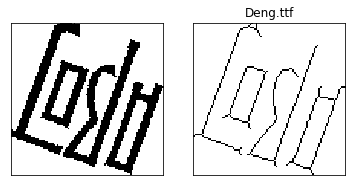

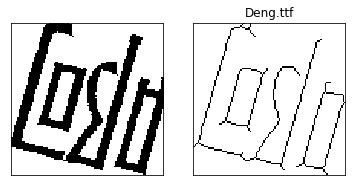

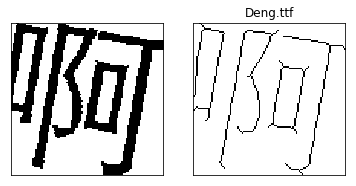

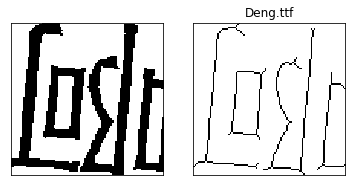

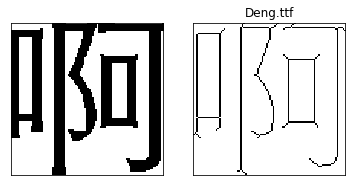

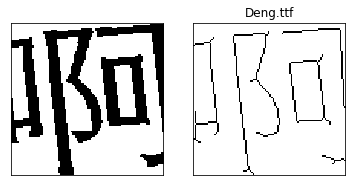

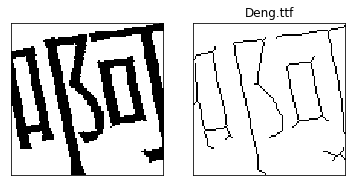

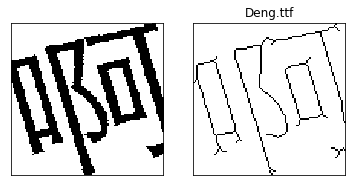

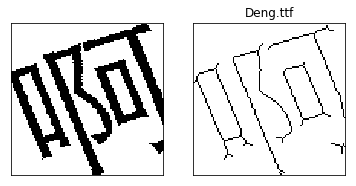

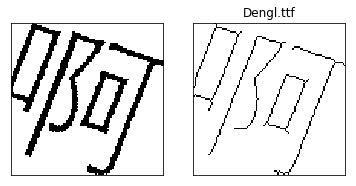

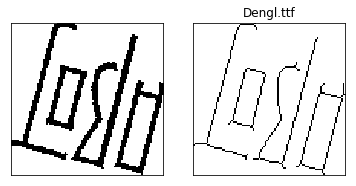

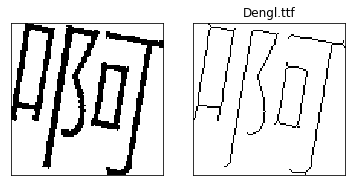

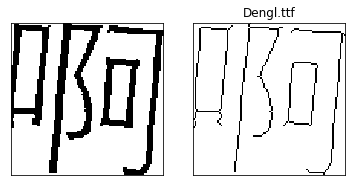

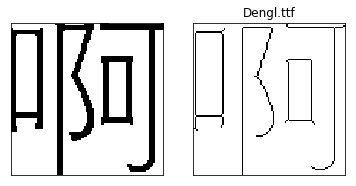

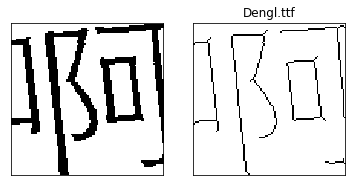

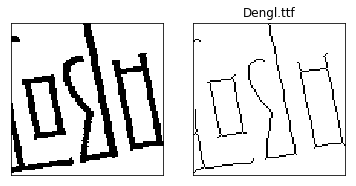

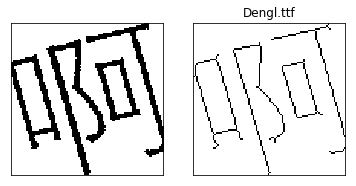

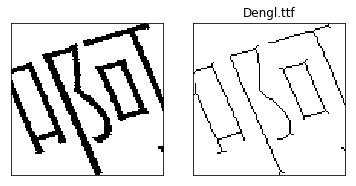

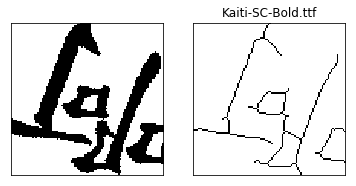

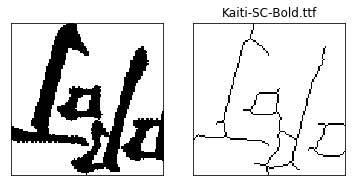

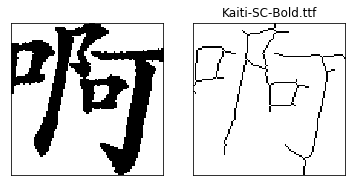

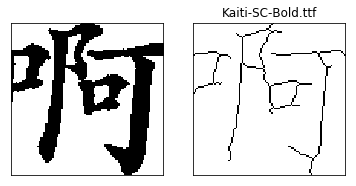

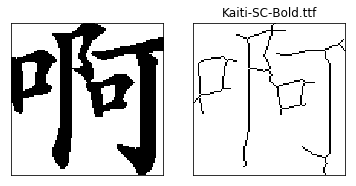

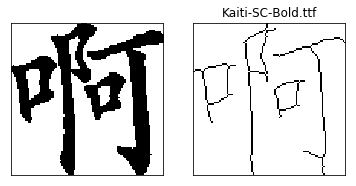

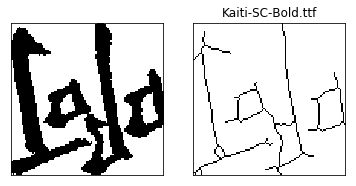

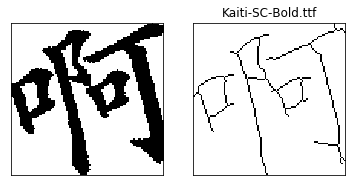

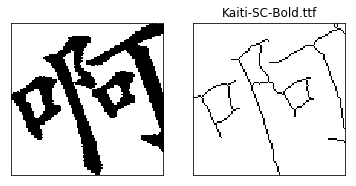

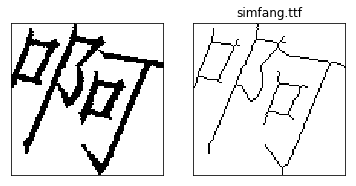

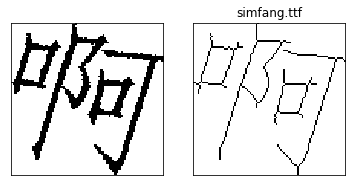

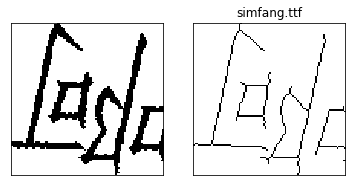

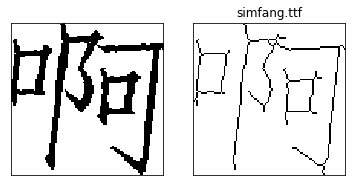

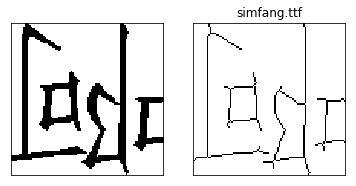

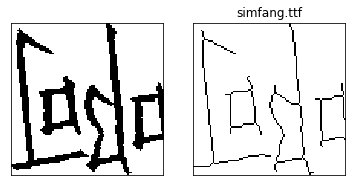

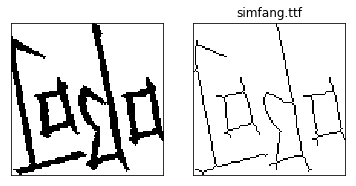

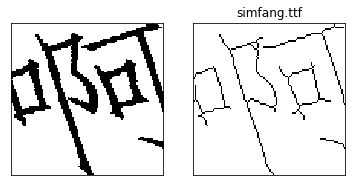

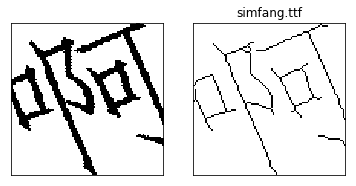

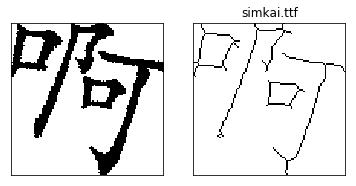

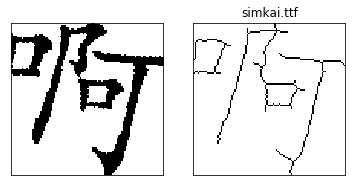

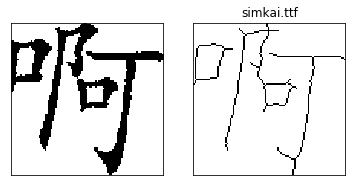

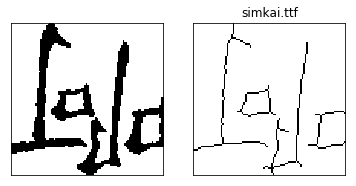

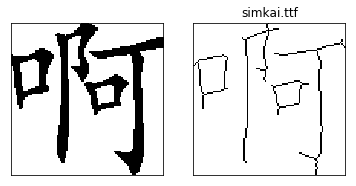

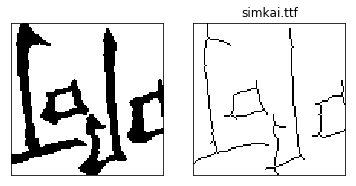

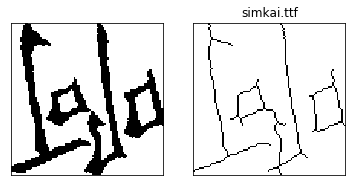

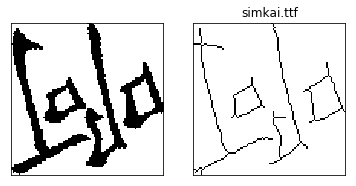

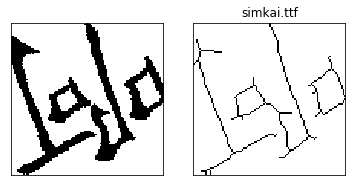

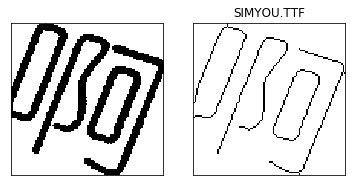

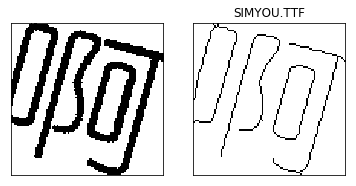

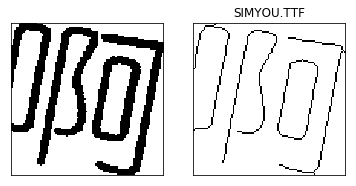

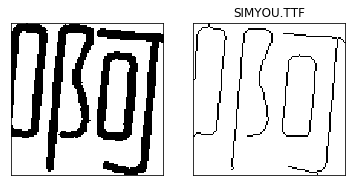

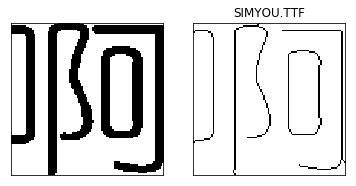

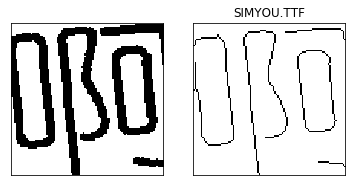

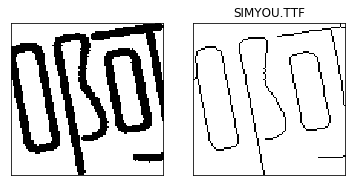

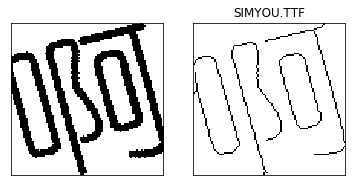

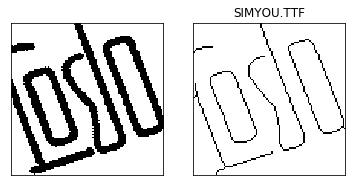

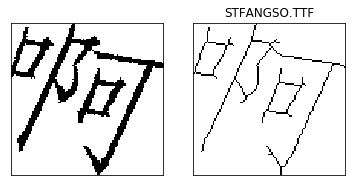

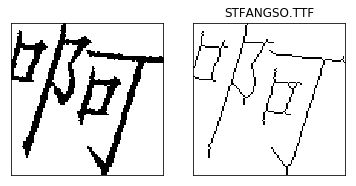

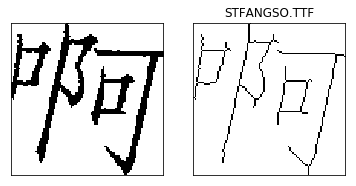

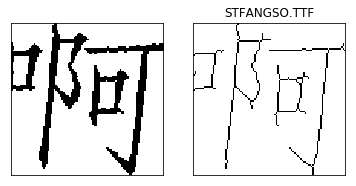

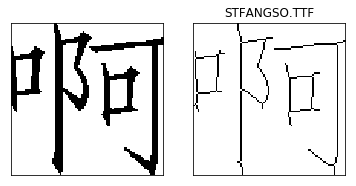

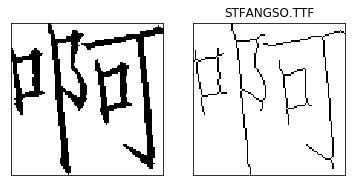

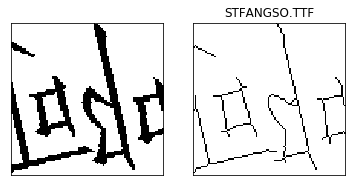

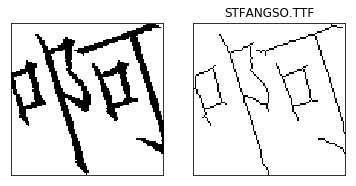

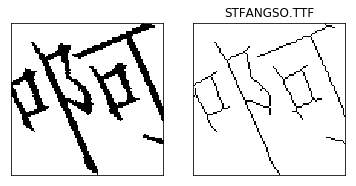

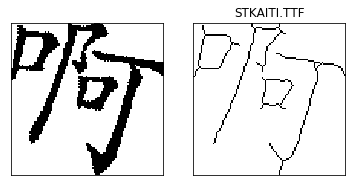

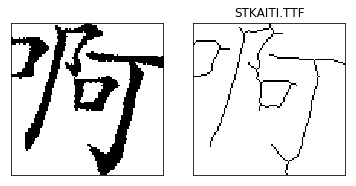

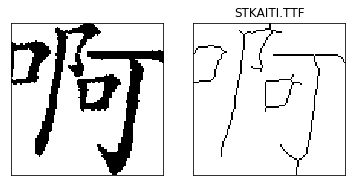

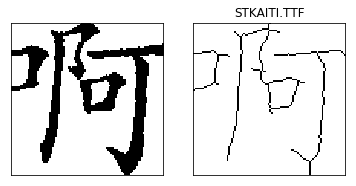

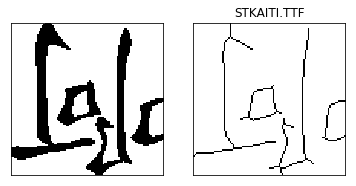

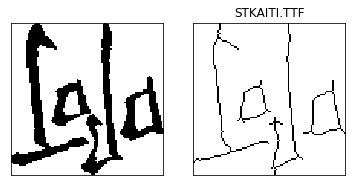

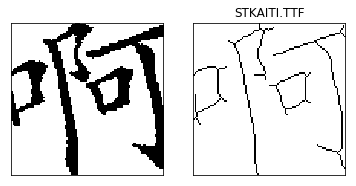

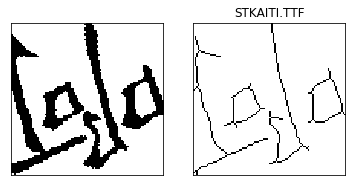

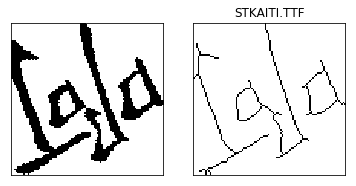

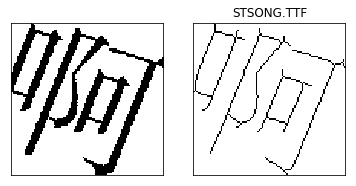

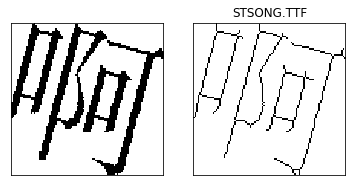

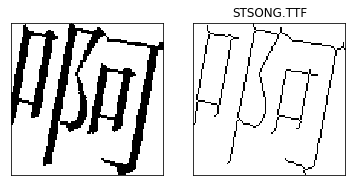

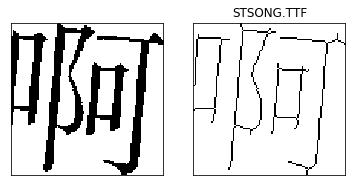

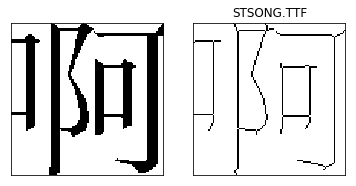

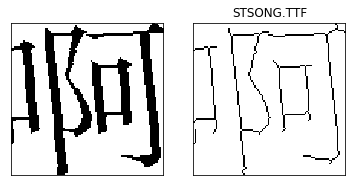

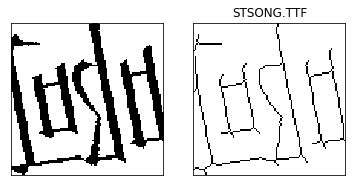

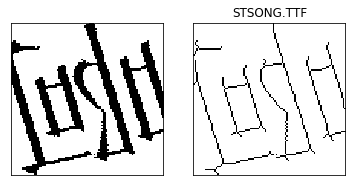

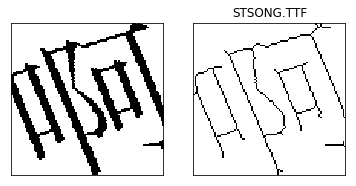

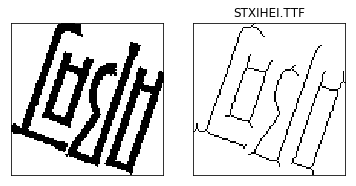

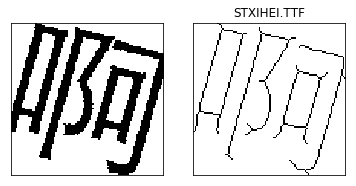

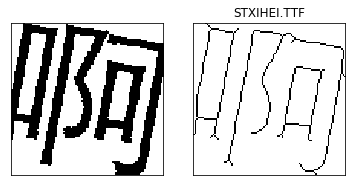

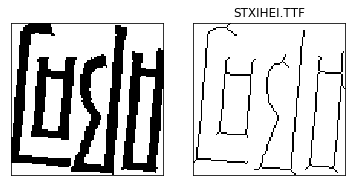

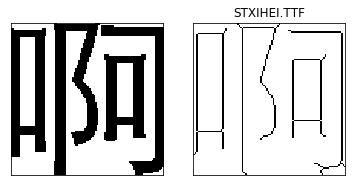

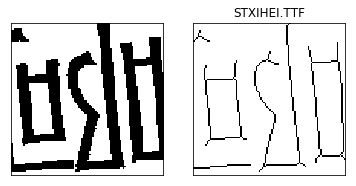

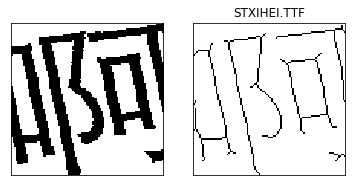

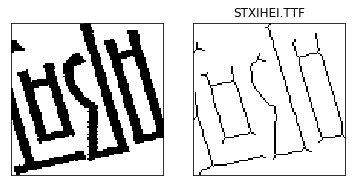

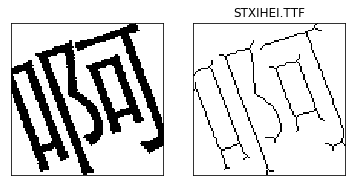

In [4]:
#得到初始数据集
class Font2Img(object):
    """
    
    """
    def __init__(self,
                 width,
                 height,
                 ):
        self.width = width
        self.height = height
    
    def get_image(self,font_path, word, rotate, crop,is_reversed ):
        """
        :param font_path: str,字体文件绝对路径 
        :param word: str,需要转化为图像的一个汉字
        :return: narray,size=(height,width),字体图像
        """
        #白色背景
        y=1
        img = Image.new("RGB", (self.width+100, self.height+100), "white")
        draw = ImageDraw.Draw(img)
        font = ImageFont.truetype(font_path, int(self.width+50))
        draw.fontmode = "1"
        #黑色字体
        draw.text((0, 0), word,(0,0,0),font = font)   
        img = img.rotate(rotate,  expand= 1, fillcolor="white")
        # print(img.size, type(img))
        img = np.asarray(img, dtype='uint8')[:,:,0]
        # plt.imshow(img, "gray")
        # plt.show()
        img = ImageProcessing.crop_margin(img,crop)
        img = cv2.resize(img,(self.height,self.width),Image.ANTIALIAS)
        # img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
        th,img= cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        if is_reversed:
            img = img[::-1,::-1]
        return img 
    
        
def get_data(data_dir, width, height, Rotate, Rotate_step, test_ratio, crop,reversed_ratio,is_aug=0):
    id2word = {}
    word2id = {}
    with open(r"Data/id2word.pkl","rb") as f:
        id2word = pickle.load(f)
    with open(r"Data/word2id.pkl","rb") as f:
        word2id = pickle.load(f)
        
    # for item in 
    train_dir =os.path.join(data_dir, 'train') 
    test_dir = os.path.join(data_dir, 'test')
    for word, id in (('啊', 0),):# word2id.items():
        print(word, id)
        image_list = []
        font2img = Font2Img(width, height)
        for font_name in os.listdir(r"./Fonts")[:]:    
            # print(font_name)
            font_path = os.path.join(r"./Fonts",font_name)
            for rotate in range(-Rotate, Rotate+1, Rotate_step):
                is_reversed = random.random()<reversed_ratio
                img = font2img.get_image(font_path, word, rotate,crop,is_reversed)
                image_list.append((img,is_reversed))
                aug_img = None
                flag = None
                if is_aug :
                    rand = random.random()
                    if rand < 0.25:
                        aug_img = ImageProcessing.dilate(img,3)
                        flag =1
                    elif rand < 0.5:
                        aug_img = ImageProcessing.erode(img,3)
                        flag =2
                    elif rand < 0.75:
                        aug_img = ImageProcessing.closing(img,3)
                        flag =3
                    else:
                        aug_img = ImageProcessing.opening(img,3)
                        flag =4
                    image_list.append((aug_img,is_reversed))
                fig,ax = plt.subplots(1,2)
                ax[0].imshow(img,cmap="gray")
                # ax[1].imshow(aug_img,cmap="gray")
                ax[1].imshow(XiHua.Xihua(img),cmap="gray")
                # ax[3].imshow(xihua.Xihua(aug_img,xihua.array),cmap="gray")
                # 
                ax[0].set_xticks([])
                ax[0].set_yticks([])
                ax[1].set_xticks([])
                ax[1].set_yticks([])
                plt.title(font_name)
                plt.show()
        # test_num = len(image_list) * test_ratio 
        # np.random.shuffle(image_list)
        # count = 0
        # for i in range(len(image_list)):
        #    img = image_list[i][0] 
        #    is_reversed = image_list[i][1]
        #    if count < test_num:
        #        word_dir =os.path.join(test_dir,'%0.5d'%id) 
        #    else:
        #        word_dir =os.path.join(train_dir,'%0.5d'%id)
        # 
        #    if not os.path.isdir(word_dir): 
        #       os.makedirs(word_dir)
        #    path_image = os.path.join(word_dir, '%d %d.png'% (count,is_reversed))
        #    cv2.imwrite(path_image, img)
        #    count +=1
            
if __name__ =="__main__":
    width = 100
    height = 100
    Rotate = 20
    Rotate_step = 5 
    test_ratio = 0.02
    crop = 15# 字左右随机裁剪0-15个像素
    reversed_ratio = 0.4
    data_dir = r'kNNData'
    get_data(data_dir, width, height, Rotate, Rotate_step, test_ratio, crop,reversed_ratio, is_aug=False)

In [14]:
a =np.array([1,2])
b = []
b.append(a)
b.append(a)
print(b)
a[1] = 3
print(b)


[array([1, 2]), array([1, 2])]
[array([1, 3]), array([1, 3])]
